In [13]:
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import matplotlib.gridspec as gridspec
import composite

In [14]:
import matplotlib.patheffects as PathEffects

In [15]:
%matplotlib inline

In [3]:
def make_colorbar(composites):
    params = []
    # for comp in composites:
    # 	params.append(np.average(comp.dm15_array[comp.x1:comp.x2]))
    # norm = matplotlib.colors.Normalize(vmin=np.min(params),vmax=np.max(params))
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=len(composites) + 1.)
    c_m = matplotlib.cm.plasma
    # c_m = matplotlib.cm.winter_r
    s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
    s_m.set_array([])

    return s_m

In [48]:
def comparison_plot(composites, sn_arrays):

#     plt.style.use('ggplot')
    colors = [color['color'] for color in list(plt.rcParams['axes.prop_cycle'])]
    h = [3,1,1,1,1,1,1]

#     gs = gridspec.GridSpec(7, 1, height_ratios=h, hspace = .001)
#     fig = plt.figure(num = 1, dpi = 100, figsize = [10,10])
    fig = plt.figure(num = 1, dpi = 100, figsize = [10,8])
    s_m = make_colorbar(composites)
    lw = 3

    plt.rc('font', family='serif')
    plt.gca().set_yticklabels([])
    plt.minorticks_on()
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(
        which='major', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=10)
    plt.tick_params(
        which='minor', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=5)
    
#     composites, scales = composite.optimize_scales(composites, composites[0], True)
    comp = composites[0]
#     param = k
    rel_flux = plt.subplot(111)
    plt.ylabel('Relative Flux + Const.', fontsize=20)
#     plt.plot(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], linewidth = lw, color = [0.43924706, 0., 0.50192941, 1.])
    colors = ["#FC3624", "#E6B836"]
    i=0
    
#     names = ['2006oa','2006ot']
    names = ['2006oa', '2002jy']
    for SN in sn_arrays[0]:
        if SN.name in names:
            plt.plot(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], linewidth = 2, color = colors[i], alpha = .9)
            i+=1
    for SN in sn_arrays[0]:
        if SN.name == '2004as':
            plt.plot(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], linewidth = 2, color = '#62AB7B', alpha = .9)
            
    for SN in sn_arrays[0]:
        if SN.name == '2005m':
            plt.plot(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], linewidth = 2, color = "#09252F", alpha = .9)
            
#     plt.plot(sn_arrays[0][12].wavelength[SN.x1:SN.x2], sn_arrays[0][12].flux[SN.x1:SN.x2], linewidth = 2, color = '#62AB7B', alpha = .9)
        
    plt.plot(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2] - .6, linewidth = 5, color = '#3F627C')
    
    composites, scales = composite.optimize_scales(composites, composites[0], True)
    
    plt.plot(composites[0].wavelength[composites[0].x1:composites[0].x2], composites[0].flux[composites[0].x1:composites[0].x2] - 1.1, linewidth = 5, color = '#3F627C')
    plt.plot(composites[1].wavelength[composites[1].x1:composites[1].x2], composites[1].flux[composites[1].x1:composites[1].x2] - 1.1, linewidth = 5, color = '#8D1D11')

    plt.xlabel( 'Rest Wavelength ' + "($\mathrm{\AA}$)", fontsize=20)
    plt.xlim(3300,7200)
    plt.ylim(-1., 1.3)
    # cb = plt.colorbar(s_m, ax = fig.axes)
    # cb.set_label('Phase', fontdict = font)
    # for ax in fig.axes:
    # 	ax.set_axis_bgcolor('white')
    
    ax = plt.axes()
    ax.arrow(5036, .21, 0, -.2, width = 10, head_width=100, head_length=.1, fc='k', ec='k')
    ax.arrow(5036, -.26, 0, -.2, width = 10, head_width=100, head_length=.1, fc='k', ec='k')
    
    txt1 = plt.text(5500, .44, "Individual Spectra", color='#3F627C', fontsize = 20)
    txt1.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='k')])
    txt2 = plt.text(5500, -.18, "Composite Spectrum", color='#3F627C', fontsize = 20)
    txt2.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='k')])
    txt3 = plt.text(5500, -.62, "Comparison", color='#3F627C', fontsize = 20)
    txt3.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='k')])
#     ax.arrow(0, 0, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')


    
    plt.show()

In [8]:
query_dm15_max_fewer_bins = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source < .98 or dm15_from_fits < .98))",
                             "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.3 and dm15_source < 1.8) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.8))"]

In [20]:
comps, sn_arrays, boot_sn_arrays = query_db.main(len(query_dm15_max_fewer_bins), query_dm15_max_fewer_bins, boot='nb', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source < .98 or dm15_from_fits < .98))
159 questionable files currently ignored
0 questionable spectra removed 37 spectra left
0 Peculiar Ias removed 37 spectra left
37 spectra with host corrections
159 questionable files currently ignored
27 valid SNe found
Arrays cleaned
27 spectra may have telluric contamination
1994s sn1994s-19940616-uoi.flm 34.8971198257 0.94 None 0.998840596273 0.015177 bsnip 3124.0 11082.0 11.0
Host correction...
1998es sn1998es-19981125-ui-corrected.flm 69.1436677309 0.85 None 0.496750833938 0.010567 bsnip 3346.0 10044.0 8.0
Host correction...
1999aa sn1999aa-19990223-ui.flm 44.0459361476 0.78 None 0.460351148368 0.014443 bsnip 3344.0 10350.0 14.0
Host correction...
2001cp sn2001cp-20010629-ui.flm 24.0178237234 0.88 None 0.917447344588 0.022402 bsnip 3278.0 10124.0 13.0
Host correction...
2002de sn2002de-20020608.374-ui-correcte

In [24]:
norm = 1./np.amax(comps[0].flux[comps[0].x1:comps[0].x2])
comps[0].flux = norm*comps[0].flux

for SN in sn_arrays[0]:
    SN.flux = norm*SN.flux
    print np.amax(SN.flux[SN.x1:SN.x2])
    

1.01700971129
0.994935778559
0.995117555481
0.897676605552
1.15464666013
1.22741503804
1.38525176965
1.04750205851
1.02076652213
0.872214947167
1.09087126532
0.964554812412
1.12700131096
1.00121901893
0.982064019638
1.37992933524
1.54450773853
1.2429223256
1.06347886347
1.17869511419
1.11948373534
1.28989296248
1.32836756139
1.270524794
0.869460970118
0.945992940635
1.27477704293


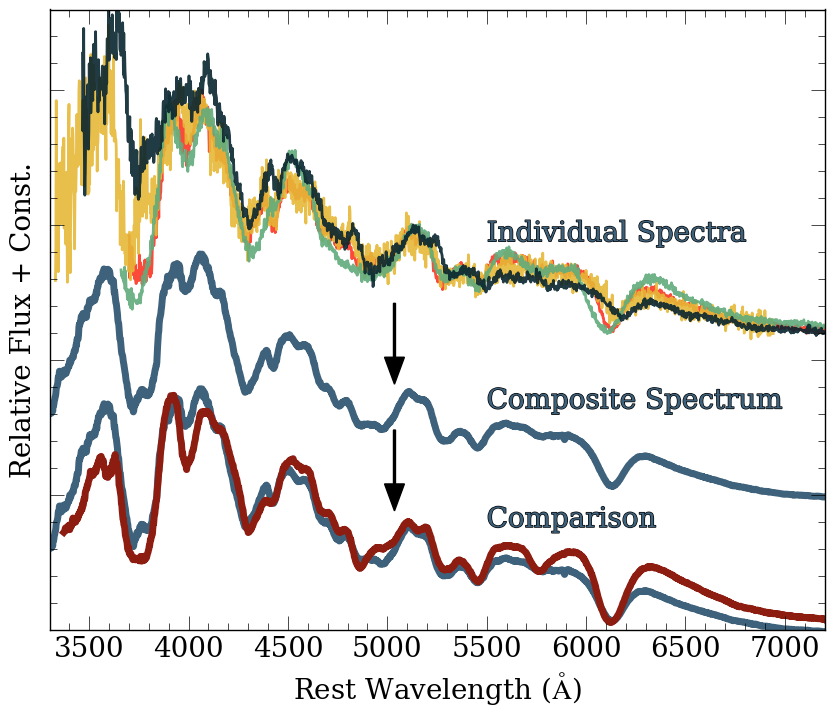

In [50]:
query_db.set_min_num_spec(comps, 5)
comparison_plot(comps, sn_arrays)
plt.savefig("../../../Paper_Drafts/reprocessing/procedure.pdf", dpi = 300, bbox_inches = 'tight')

In [ ]:
#emphasize not standard candles, parameters that do not correlate with lum. correct for cosmology, 
#lc shape color. remains correlations between hubres and host gal (what is causing this probably not host that is just proxy)
#something there not taking into account
#photometry good, but spectra have way more info

#new trends: diversity: high low velocity, carbon, polarization, redshifted features, outflow from progenitor
#database has *all* of the useful info that we have ever taken
#continually adding new data foundation, more public data as well